# **Netflix - TV Shows and Movies**

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in May 2022 containing data available in the United States.
Content

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

    ID: The title ID on JustWatch.
    title: The name of the title.
    show type: TV show or movie.
    description: A brief description.
    release year: The release year.
    age certification: The age certification.
    runtime: The length of the episode (SHOW) or movie.
    genres: A list of genres.
    production countries: A list of countries that produced the title.
    seasons: Number of seasons if it's a SHOW.
    IMDB ID: The title ID on IMDB.
    IMDB Score: Score on IMDB.
    IMDB Votes: Votes on IMDB.
    TMDB Popularity: Popularity on TMDB.
    TMDB Score: Score on TMDB.

And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:

    person ID: The person ID on JustWatch.
    ID: The title ID on JustWatch.
    name: The actor or director's name.
    character name: The character name.
    role: ACTOR or DIRECTOR.

Tasks

   - Developing a content-based recommender system using the genres and/or descriptions.
   - Identifying the main content available on the streaming.
   - Network analysis on the cast of the titles.
   - Exploratory data analysis to find interesting insights.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date, time
from dateutil import parser

In [16]:
titles = pd.read_csv('titles.csv')
titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


In [17]:
titles.shape

(5806, 15)

In [18]:
credits = pd.read_csv('credits.csv')
credits.head(5)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [19]:
credits.shape

(77213, 5)

In [20]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [21]:
# lets merge both files
merged = pd.merge(titles, credits, left_on = 'id', right_on = 'id', how ='inner' )

In [22]:
merged.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,14658,Jodie Foster,Iris Steensma,ACTOR


In [23]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77213 entries, 0 to 77212
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77213 non-null  object 
 1   title                 77212 non-null  object 
 2   type                  77213 non-null  object 
 3   description           77160 non-null  object 
 4   release_year          77213 non-null  int64  
 5   age_certification     46595 non-null  object 
 6   runtime               77213 non-null  int64  
 7   genres                77213 non-null  object 
 8   production_countries  77213 non-null  object 
 9   seasons               13976 non-null  float64
 10  imdb_id               73388 non-null  object 
 11  imdb_score            72937 non-null  float64
 12  imdb_votes            72850 non-null  float64
 13  tmdb_popularity       77202 non-null  float64
 14  tmdb_score            76093 non-null  float64
 15  person_id          

In [24]:
merged.shape

(77213, 19)

In [25]:
merged.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
release_year,1.000000,-0.217585,-0.545062,-0.145228,-0.267392,0.065736,0.014113,0.200378
runtime,-0.217585,1.000000,-0.193556,-0.028351,0.247052,-0.040442,-0.170430,-0.024206
seasons,-0.545062,-0.193556,1.000000,0.076199,0.292985,0.332364,0.020111,-0.142583
imdb_score,-0.145228,-0.028351,0.076199,1.000000,0.287113,-0.018115,0.691457,-0.058152
imdb_votes,-0.267392,0.247052,0.292985,0.287113,1.000000,0.124180,0.190637,-0.107475
tmdb_popularity,0.065736,-0.040442,0.332364,-0.018115,0.124180,1.000000,0.068105,0.016325
tmdb_score,0.014113,-0.170430,0.020111,0.691457,0.190637,0.068105,1.000000,0.032310
person_id,0.200378,-0.024206,-0.142583,-0.058152,-0.107475,0.016325,0.032310,1.000000


<AxesSubplot:>

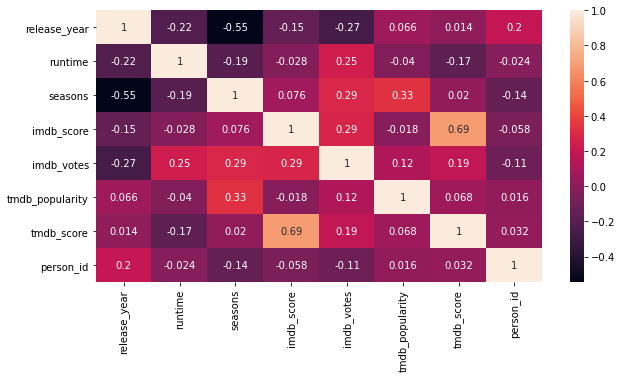

In [26]:
fig,ax = plt.subplots( figsize = (10,5))
sns.heatmap(merged.corr(), annot = True)

In [27]:
merged.isna().sum()

id                          0
title                       1
type                        0
description                53
release_year                0
age_certification       30618
runtime                     0
genres                      0
production_countries        0
seasons                 63237
imdb_id                  3825
imdb_score               4276
imdb_votes               4363
tmdb_popularity            11
tmdb_score               1120
person_id                   0
name                        0
character                9627
role                        0
dtype: int64

In [36]:
merged.genres.str.join('')

0                [-'-c-r-i-m-e-'-,- -'-d-r-a-m-a-'-]
1                [-'-c-r-i-m-e-'-,- -'-d-r-a-m-a-'-]
2                [-'-c-r-i-m-e-'-,- -'-d-r-a-m-a-'-]
3                [-'-c-r-i-m-e-'-,- -'-d-r-a-m-a-'-]
4                [-'-c-r-i-m-e-'-,- -'-d-r-a-m-a-'-]
                            ...                     
77208    [-'-a-c-t-i-o-n-'-,- -'-t-h-r-i-l-l-e-r-'-]
77209    [-'-a-c-t-i-o-n-'-,- -'-t-h-r-i-l-l-e-r-'-]
77210    [-'-a-c-t-i-o-n-'-,- -'-t-h-r-i-l-l-e-r-'-]
77211    [-'-a-c-t-i-o-n-'-,- -'-t-h-r-i-l-l-e-r-'-]
77212    [-'-a-c-t-i-o-n-'-,- -'-t-h-r-i-l-l-e-r-'-]
Name: genres, Length: 77213, dtype: object